## importing Modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
salesData = pd.read_csv("salesData.csv")

In [3]:
salesData.head()

,id,nItems,mostFreqStore,mostFreqCat,nCats,preferredBrand,nBrands,nPurch,salesLast3Mon,salesThisMon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration
0,1,1469,Stockton,Alcohol,72,Veina,517,82,2741.97,1283.87,1,1.866555,33.438659,821
1,2,1463,Stockton,Alcohol,73,Veina,482,88,2790.58,1242.60,1,1.907437,31.711136,657
2,3,262,Colorado Springs,Shoes,55,Bo,126,56,1529.55,682.57,1,5.837977,27.313393,548
3,4,293,Colorado Springs,Bakery,50,Veina,108,43,1765.81,730.23,1,6.026655,41.065349,596
4,5,108,Colorado Springs,Beverages,32,Bo,79,18,1180.00,552.54,12,10.925926,65.555556,603


## Correlation Matrix 

                        

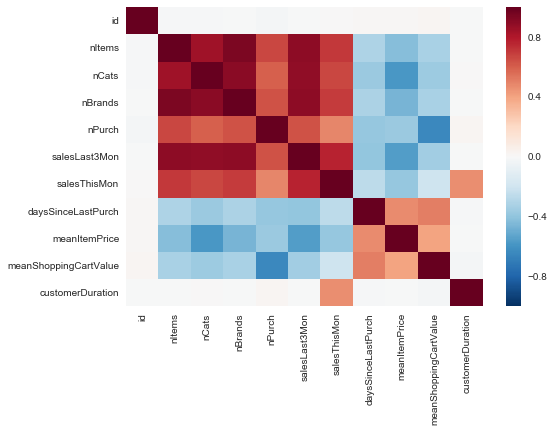

In [4]:
# calculate the correlation matrix
corr1 = salesData.corr()

# plot the heatmap
sns.heatmap(corr1)
plt.show()

## Frequent Stores

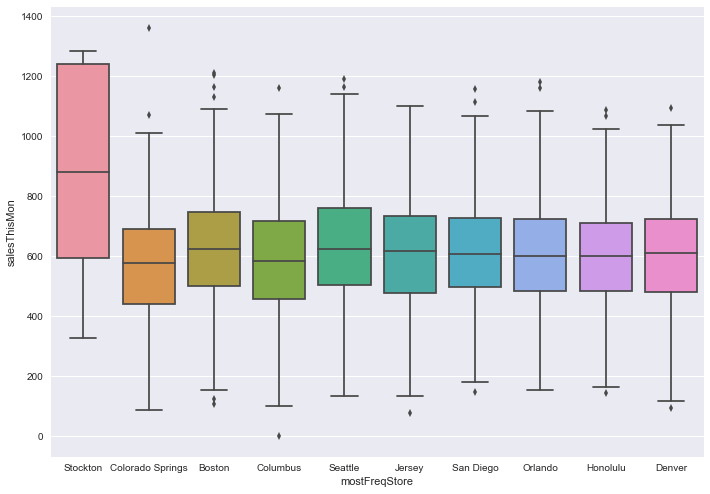

In [5]:
# Frequent stores
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='mostFreqStore', y ='salesThisMon',data=salesData)
plt.plot(figsize=(20,10))
plt.xlabel='Most Frequent store'
plt.ylabel='Sales This Month'
plt.title='sales Data'
plt.show()
plt.clf()

## Preffered Brand

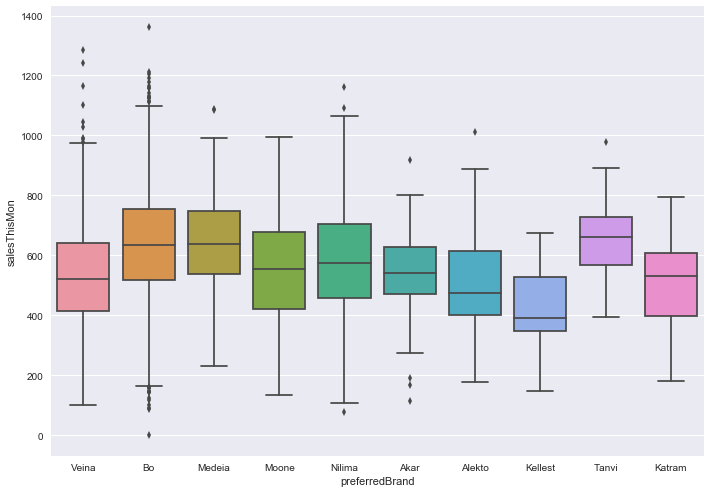

In [6]:
# Most preffered Brand
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='preferredBrand', y ='salesThisMon',data=salesData)
plt.plot(figsize=(20,10))
plt.xlabel='Prefferd Brand'
plt.ylabel='Sales This Month'
plt.title='sales Data'
plt.show()
plt.clf()

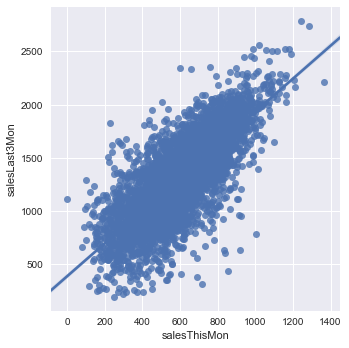

In [8]:
# Plot outputs
sns.lmplot(data=salesData,
           x='salesThisMon',
           y='salesLast3Mon')
plt.show()

## Estimating Simple Linear Model

We saw that the sales in the last three months are strongly positively correlated with the sales in this month. Hence we will start off including that as an explanatory variable in a linear regression.

In [9]:
X_s = salesData["salesLast3Mon"]
y_s = salesData["salesThisMon"]

# Fit and make the predictions by the model
salesmodel = sm.OLS (y_s,X_s).fit()
predictions = salesmodel.predict(X_s)

# Print out the statistics
salesmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           salesThisMon   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.363e+05
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:26:28   Log-Likelihood:                -31811.
No. Observations:                5122   AIC:                         6.362e+04
Df Residuals:                    5121   BIC:                         6.363e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
salesLast3Mon     0.4526      0.001    369.130      0.000       0.450       0.455
==============================================================================
Omnibus:                      209.708   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.167
Skew:                          -0.019   Prob(JB):                    1.10e-146
Kurtosis:                       4.774   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X_s1 = salesData[["nItems","nCats",
                  "nBrands","nPurch","salesLast3Mon","daysSinceLastPurch",
                  "meanItemPrice","meanShoppingCartValue","customerDuration"]]
y_s1 = salesData[["salesThisMon"]]

In [21]:
# Fit and make the predictions by the model
model1 = sm.OLS(y_s1,X_s1).fit()


# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           salesThisMon   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.130e+04
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:51:05   Log-Likelihood:                -29996.
No. Observations:                5122   AIC:                         6.001e+04
Df Residuals:                    5113   BIC:                         6.007e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
nItems                    0.4529      0.027     16.821      0.000       0.400       0.506
nCats                    -2.2999      0.234     -9.810      0.000      -2.760      -1.840
nBrands                   0.2732      0.090      3.034      0.002       0.097       0.450
nPurch                   -0.5059      0.157     -3.214      0.001      -0.814      -0.197
salesLast3Mon             0.2307      0.007     32.374      0.000       0.217       0.245
daysSinceLastPurch       -0.2818      0.166     -1.702      0.089      -0.606       0.043
meanItemPrice            -0.8221      0.092     -8.970      0.000      -1.002      -0.642
meanShoppingCartValue     0.0534      0.028      1.937      0.053      -0.001       0.107
customerDuration          0.4633      0.007     67.903      0.000       0.450       0.477
==============================================================================
Omnibus:                       28.301   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.469
Skew:                           0.002   Prob(JB):                     1.63e-09
Kurtosis:                       3.435   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Calculate Variance Inflation factor

In [16]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_s1.values, i) for i in range(X_s1.shape[1])]
vif["features"] = X_s1.columns

In [17]:
vif.round(1)

,VIF Factor,features
0,27.7,nItems
1,59.0,nCats
2,52.3,nBrands
3,9.8,nPurch
4,68.5,salesLast3Mon
5,2.3,daysSinceLastPurch
6,2.5,meanItemPrice
7,6.7,meanShoppingCartValue
8,14.6,customerDuration


In [18]:
def calculate_vif(X):
    thresh = 5.0
    output = pd.DataFrame()
    k = X.shape[1]
    vif = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = X.drop(X.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
train_out = calculate_vif(X_s1)

Iteration no.
1
[27.707224543319033, 58.985568163618467, 52.264371214369923, 9.790911672631843, 68.512766395562764, 2.3342858626307792, 2.5184902985776545, 6.6554809356924718, 14.576458389604749]
Max VIF is for variable no.:
4
Iteration no.
2
[26.729225318999354, 39.441021432086814, 52.263913049012636, 8.8570392705048011, 2.308128066114886, 2.5183305422440392, 5.8551164130698679, 12.362608701747323]
Max VIF is for variable no.:
2
Iteration no.
3
[10.624979564199949, 25.114933234994858, 8.8314043501200885, 2.3065708105163742, 2.5162482334543004, 5.843749441328165, 12.22585849889983]
Max VIF is for variable no.:
1
Iteration no.
4
[6.0056833739224835, 8.1362171401445842, 2.3055532622919888, 2.3024035441458328, 5.3202186984896516, 8.5722680232591451]
Max VIF is for variable no.:
5
Iteration no.
5
[6.0052303061049281, 5.3847152216478298, 2.3053454250894103, 2.2651295509565212, 3.3484976821865624]
Max VIF is for variable no.:
0
Iteration no.
6
[1.356599631177646, 2.2946721625213429, 2.077855

In [19]:
train_out.head()

,nPurch,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue
0,82,1,1.866555,33.438659
1,88,1,1.907437,31.711136
2,56,1,5.837977,27.313393
3,43,1,6.026655,41.065349
4,18,12,10.925926,65.555556


In [22]:
print(model1.aic)

60009.3782822


In [23]:
sales2 = pd.read_csv("salesDataMon2To4.csv")

In [25]:
sales2.head()

,id,nItems,mostFreqStore,mostFreqCat,nCats,preferredBrand,nBrands,nPurch,salesLast3Mon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration
0,1,1401,Stockton,Alcohol,73,Veina,483,85,2712.99,3,1.936467,31.917529,852
1,2,1461,Stockton,Alcohol,74,Veina,484,86,2744.57,2,1.878556,31.913605,688
2,3,262,Colorado Springs,Shoes,55,Bo,131,55,1527.10,1,5.828626,27.765455,579
3,4,250,Colorado Springs,Bakery,43,Veina,93,44,1675.11,2,6.700440,38.070682,627
4,5,149,Colorado Springs,Packaged food,36,Bo,90,27,1265.18,4,8.491141,46.858519,634


In [30]:
sales2.describe()

,id,nItems,nCats,nBrands,nPurch,salesLast3Mon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration
count,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000
mean,2729.056447,185.899865,36.231780,81.660352,20.016431,1323.844042,6.588633,12.115840,91.880634,676.777112
std,1572.668735,136.364143,13.194827,47.520664,12.697227,367.975471,9.377704,15.891175,64.213502,150.659096
min,1.000000,1.000000,1.000000,1.000000,1.000000,188.990000,1.000000,1.878556,17.579420,31.000000
25%,1372.000000,84.000000,27.000000,45.000000,11.000000,1068.170000,2.000000,6.049118,53.884286,580.000000
50%,2733.000000,155.000000,37.000000,75.000000,17.000000,1330.820000,4.000000,8.555823,75.773000,682.000000
75%,4085.000000,257.000000,46.000000,110.000000,27.000000,1569.690000,7.000000,12.968941,109.736154,777.000000
max,5455.000000,1461.000000,74.000000,484.000000,86.000000,2744.570000,87.000000,313.050000,1147.660000,1386.000000


In [31]:
model1.predict(X_s1.head())

0    1612.291106
1    1529.788562
2     601.332503
3     705.846232
4     530.472164
dtype: float64